In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix
from google.colab import drive

data=pd.read_csv("/content/drive/MyDrive/tam-sentiment-train.csv")
data = data.sample(frac = 1)
data.head()


,text,category
14277,Seeing comments... Ada paavingalaaa.. ivloo s...,Mixed_feelings
18615,Shruthi hasaana.... Padam velangna maari thaan,Negative
24097,Vera level thalaiva.... mass marana masss,Mixed_feelings
2684,தேவராட்டம் பார்த்திருப்பீங்க இது வன்னியர் ...,Positive
24096,Why is he talking like %#^]#]^%^% ???,unknown_state


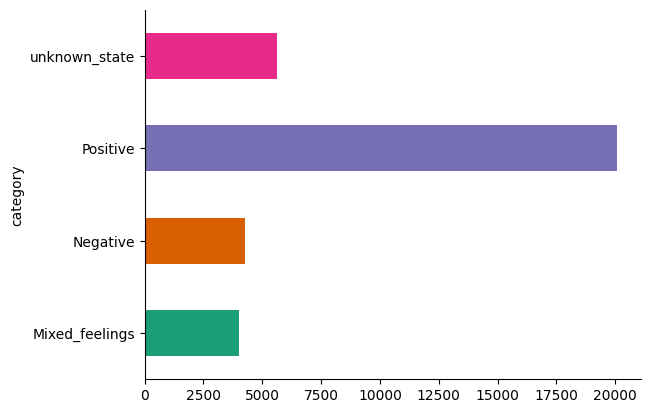

In [2]:
# @title category

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [13]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])
y = data['category']

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:

knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [20]:

y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.60002942041777


In [25]:
conf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n", conf_matrix)

Confusion matrix:
 [[   1    0  797    1]
 [   0    0  830    2]
 [   0    0 4004    6]
 [   0    0 1094   63]]


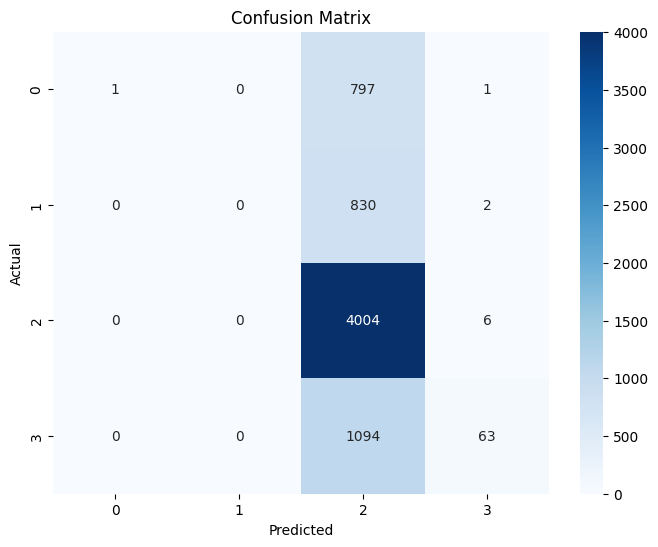

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                 precision    recall  f1-score   support

Mixed_feelings       1.00      0.00      0.00       799
      Negative       0.00      0.00      0.00       832
      Positive       0.60      1.00      0.75      4010
 unknown_state       0.88      0.05      0.10      1157

      accuracy                           0.60      6798
     macro avg       0.62      0.26      0.21      6798
  weighted avg       0.62      0.60      0.46      6798



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
